In [4]:
!pip install pydicom
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pydicom as dicom
from google.colab.patches import cv2_imshow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.2 MB/s eta 0:00:00


In [ ]:
Data = dicom.dcmread('/content/drive/MyDrive/Data_MIP/DICOM Data/knee1.dcm')
image1 = Data.pixel_array

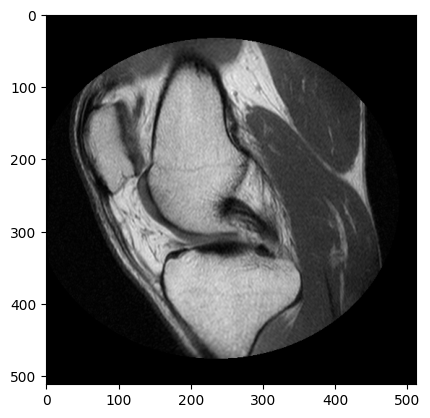

In [ ]:
plt.imshow(image1 , cmap='gray')
plt.show()

In [ ]:
print([np.min(image1) , image1.max()])

[0, 473]


In [ ]:
image1.shape

(512, 512)

In [ ]:
w, h = image1.shape
img_q = np.ones(image1.shape , np.uint8)

In [ ]:
image1[0 , 0]

0

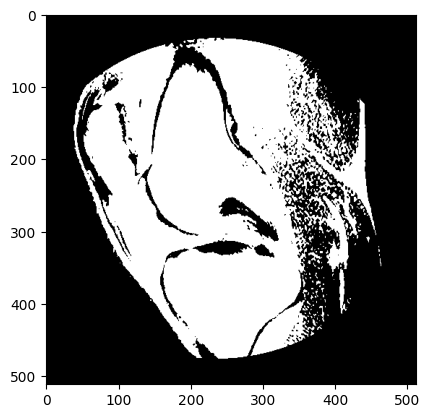

In [ ]:
Threshod = 100
for i in range(w):
  for j in range(h):

    if image1[i , j]<=Threshod:
      img_q[i , j] = 0
    else:
      img_q[i , j] = 1

plt.imshow(img_q, cmap='gray')
plt.show()

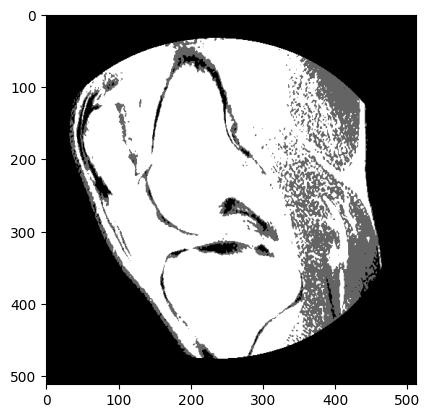

In [ ]:
w, h = image1.shape
img_q = np.zeros(image1.shape , np.uint8)

Threshod = [50, 100]

for i in range(w):
  for j in range(h):

    if image1[i , j]<Threshod[0]:
      img_q[i , j] = 0
    elif image1[i , j]>=Threshod[0] and image1[i , j]<=Threshod[1]:
      img_q[i , j] = 100
    else:
      img_q[i , j] = 255

plt.imshow(img_q, cmap='gray')
plt.show()

In [ ]:
print(np.sum(img_q==255))
print(np.sum(img_q>0))

111038
141767


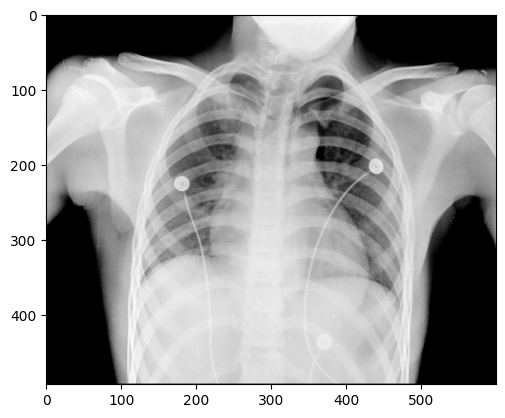

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Data_MIP/Gray Scale/Chest-X-ray.tif' , 0)
plt.imshow(image , cmap='gray')

In [ ]:
image.shape

(256, 256)

(493, 600)
float64
[0, 253]
[0.0, 1.0]


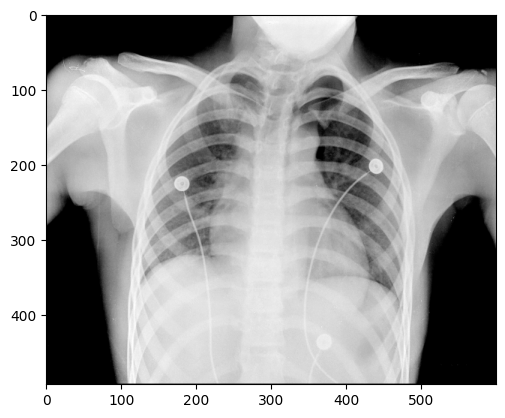

In [ ]:
# [0 , 1]
im = image
print(im.shape)

image01 = (im-im.min())/(im.max() - im.min())

print(image01.dtype)
print([np.min(im) , np.max(im)])

print([np.min(image01) , np.max(image01)])
plt.imshow(image01 , cmap='gray')

In [ ]:
image3 = cv2.normalize(image.astype('float'), None, 0, 1, cv2.NORM_MINMAX)

print(image3.dtype)
print([np.min(image3) , np.max(image3)])

float64
[0.0, 0.9999999999999999]


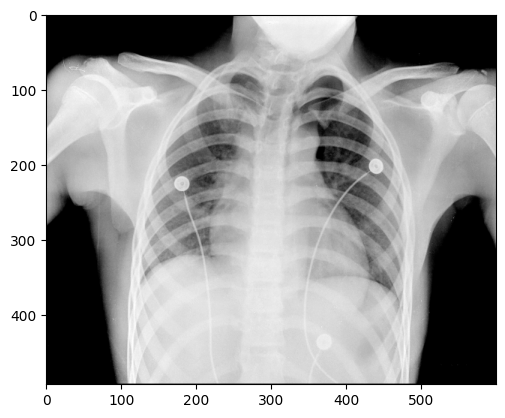

In [ ]:
plt.imshow(image3 , cmap='gray')

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Data_MIP/Gray Scale/Chest-X-ray.tif')
#plt.imshow(image)
m = np.mean(image)
s = np.std(image)
print(m)
print(s)

141.8667410412441
84.49625132609228


float64
[-1.6789708278743003, 1.3152448447667189]


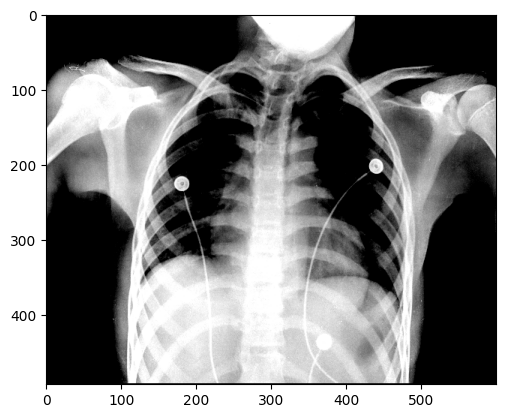

In [ ]:
image01 = (image.astype('float')-m)/(s)
print(image01.dtype)
print([np.min(image01) , np.max(image01)])
plt.imshow(image01 , cmap='gray')

In [ ]:
m1 = np.mean(image01)
s1 = np.std(image01)
print(m1)
print(s1)

-2.2137802071552006e-16
0.9999999999999999


[(493, 600), (512, 512)]


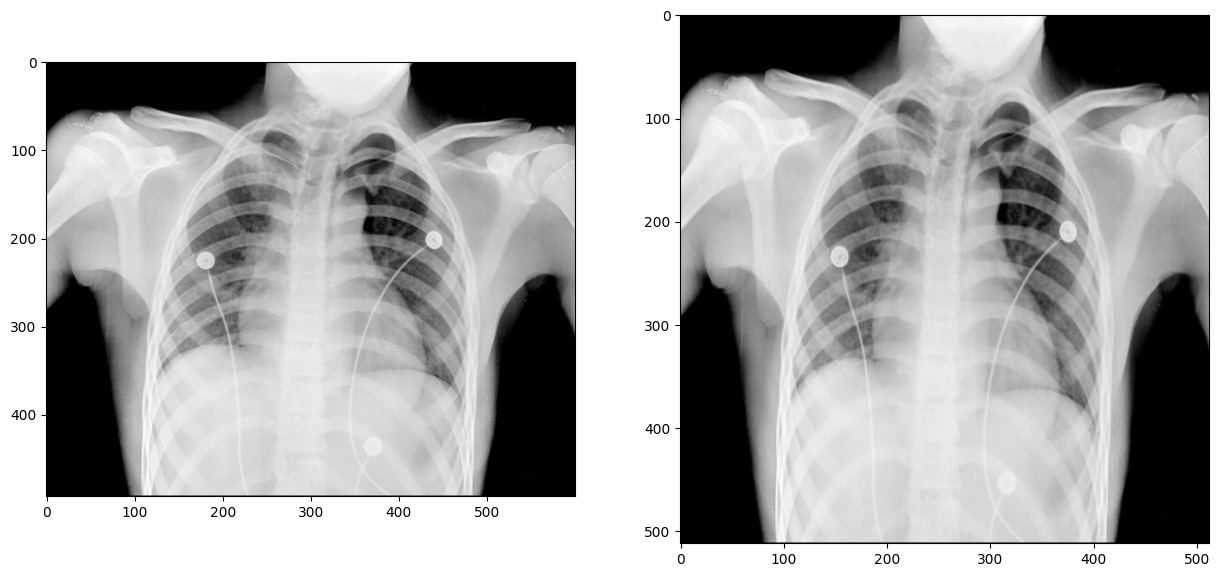

In [27]:
Im1 = cv2.imread('/content/drive/MyDrive/Data_MIP/Gray Scale/Chest-X-ray.tif' , 0).astype('uint8')
Im1 = cv2.normalize(Im1.astype('float'), None, 0, 1.0, cv2.NORM_MINMAX)

scale_percent = 20
width = int(Im1.shape[1] * scale_percent / 100)
height = int(Im1.shape[0] * scale_percent / 100)
dim = (512, 512)

resized = cv2.resize(Im1, dim, interpolation = cv2.INTER_AREA)

print([Im1.shape , resized.shape])

plt.figure(figsize = (15,15))
plt.subplot(1 , 2 , 1)
plt.imshow(Im1, cmap='gray')
plt.subplot(1 , 2 , 2)
plt.imshow(resized, cmap='gray')

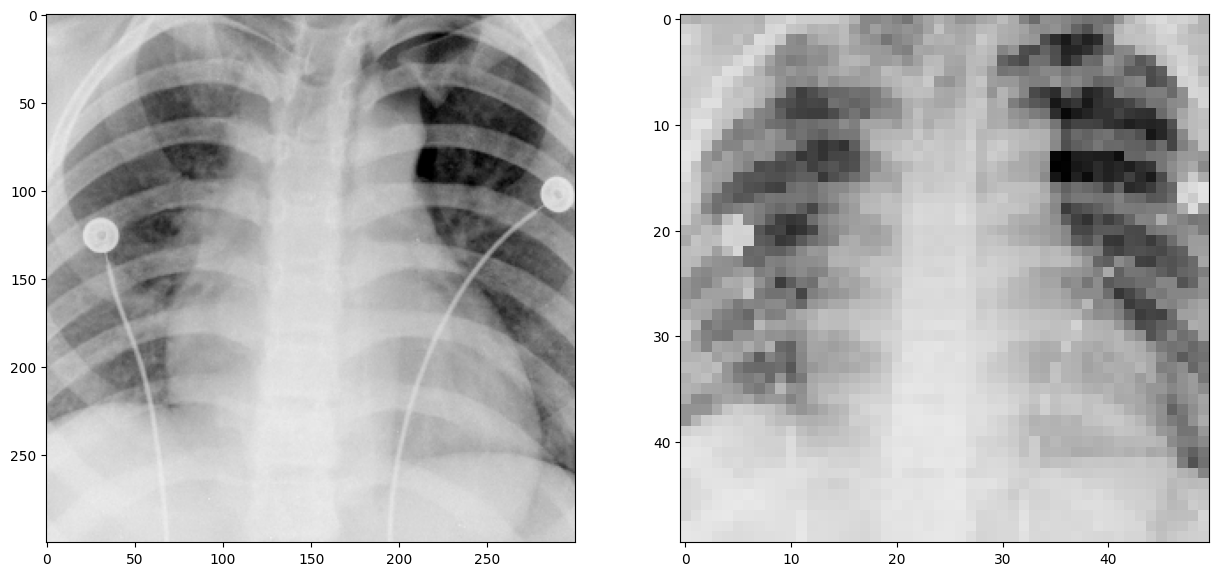

In [16]:
image = cv2.imread('/content/drive/MyDrive/Data_MIP/Gray Scale/Chest-X-ray.tif')
image_resize= cv2.resize(image[100:400,150:450], (50,50))

plt.figure(figsize = (15,15))
plt.subplot(1 , 2 , 1)
plt.imshow(image[100:400,150:450])
plt.subplot(1 , 2 , 2)
plt.imshow(image_resize)

In [19]:
!pip install pynrrd
import nrrd

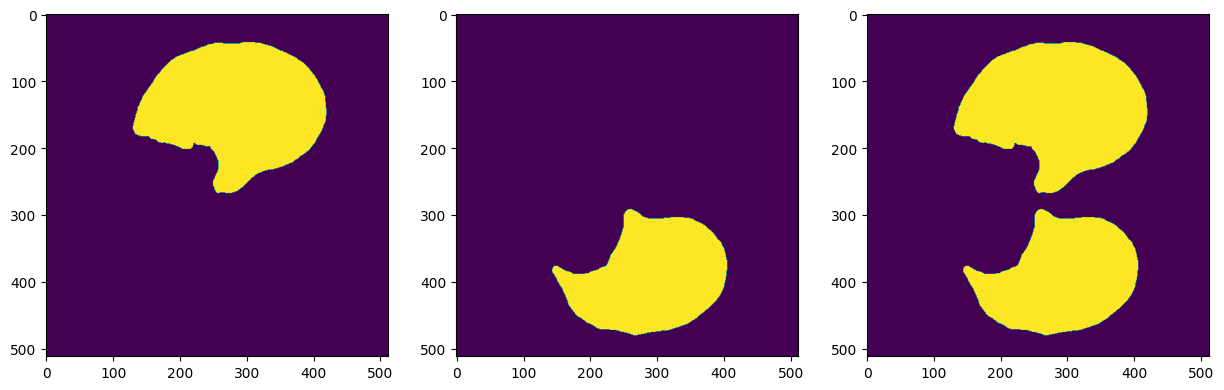

In [21]:
Im1 , headerimage = nrrd.read('/content/drive/MyDrive/Data_MIP/lung/lung_segmentation_1')
Im1_R = cv2.resize(Im1, [512 , 512], interpolation = cv2.INTER_AREA)
Im2 , headerimage = nrrd.read('/content/drive/MyDrive/Data_MIP/lung/lung_segmentation_2')
Im2_R = cv2.resize(Im2, [512 , 512], interpolation = cv2.INTER_AREA)

Im_Result = cv2.add(Im1_R, Im2_R)

plt.figure(figsize = (15,15))

plt.subplot(1 , 3 , 1)
plt.imshow(Im1_R)
plt.subplot(1 , 3 , 2)
plt.imshow(Im2_R)
plt.subplot(1 , 3 , 3)
plt.imshow(Im_Result)

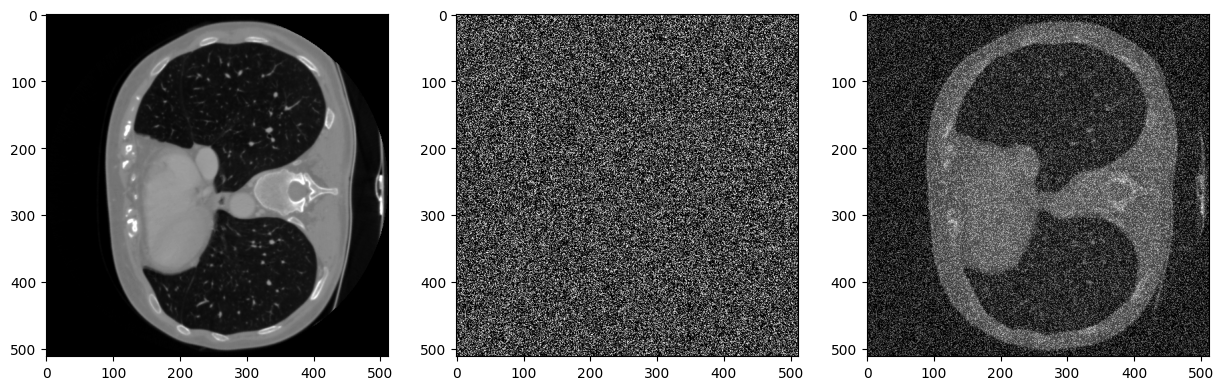

In [22]:
Im , headerimage = nrrd.read('/content/drive/MyDrive/Data_MIP/lung/lung_image')
Im = cv2.normalize(Im.astype('float'), None, 0, 255, cv2.NORM_MINMAX)

mean = 0
stddev = 200
noise = np.zeros(Im.shape, np.uint8)
cv2.randn(noise, mean, stddev)

Im_Result = Im + noise

plt.figure(figsize = (15,15))
plt.subplot(1 , 3 , 1)
plt.imshow(Im, cmap='gray')
plt.subplot(1 , 3 , 2)
plt.imshow(noise , cmap='gray')
plt.subplot(1 , 3 , 3)
plt.imshow(Im_Result, cmap='gray')

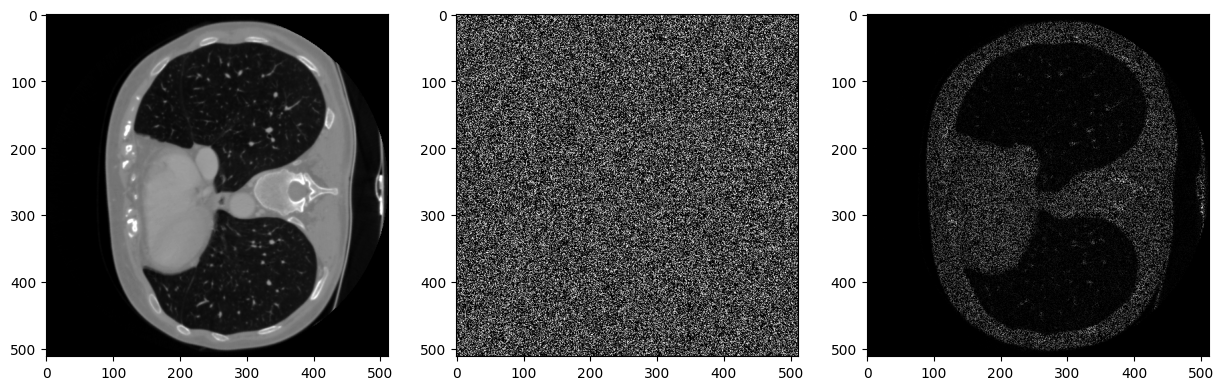

In [23]:
Im_Result = Im * noise

plt.figure(figsize = (15,15))
plt.subplot(1 , 3 , 1)
plt.imshow(Im, cmap='gray')
plt.subplot(1 , 3 , 2)
plt.imshow(noise , cmap='gray')
plt.subplot(1 , 3 , 3)
plt.imshow(Im_Result, cmap='gray')

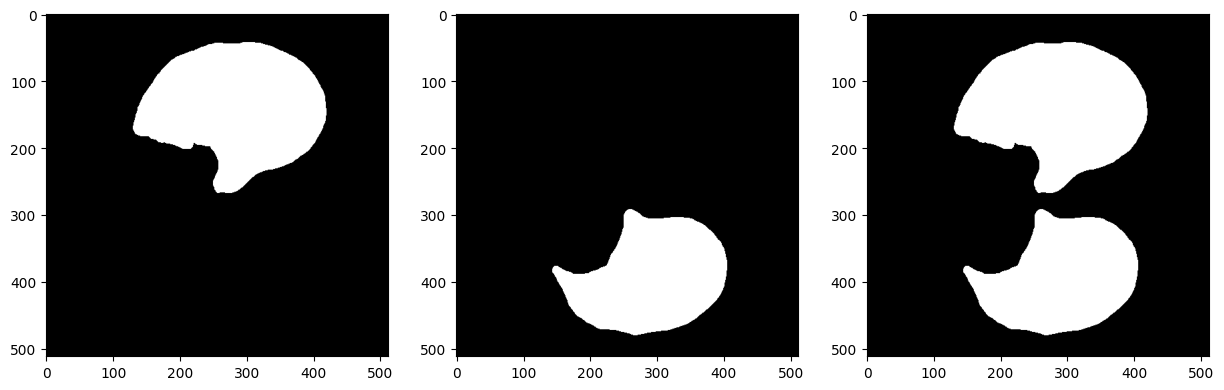

In [24]:
Im , headerimage = nrrd.read('/content/drive/MyDrive/Data_MIP/lung/lung_image')
Im = cv2.normalize(Im1.astype('float'), None, 0, 1.0, cv2.NORM_MINMAX)

Im2_new = Im2[: , : , 0]

Im_Result = cv2.bitwise_or(Im2_new , Im1)

plt.figure(figsize = (15,15))
plt.subplot(1 , 3 , 1)
plt.imshow(Im , cmap='gray')
plt.subplot(1 , 3 , 2)
plt.imshow(Im2_new , cmap='gray')
plt.subplot(1 , 3 , 3)
plt.imshow(Im_Result , cmap='gray')

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7c51da6dc2e0>)

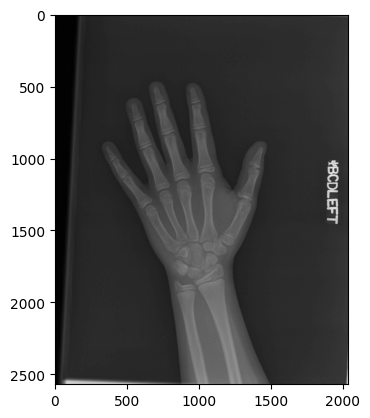

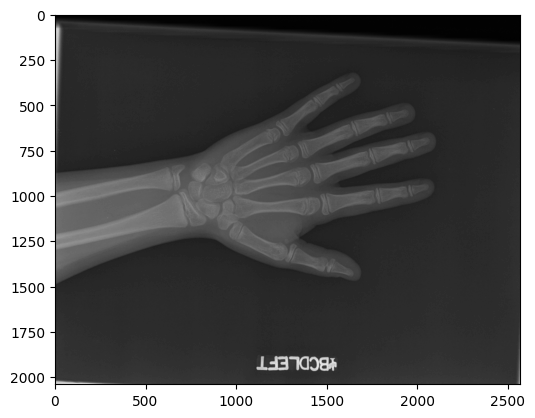

In [ ]:
Im1 = cv2.imread('/content/drive/MyDrive/Digital Image Processing Dataset/Hand Bone/1745.png' , 0).astype('uint8')
Im1 = cv2.normalize(Im1.astype('float'), None, 0, 1.0, cv2.NORM_MINMAX)

image_r = cv2.rotate(Im1, cv2.ROTATE_90_CLOCKWISE)

plt.figure(), plt.imshow(Im1 , cmap='gray')
plt.figure(), plt.imshow(image_r , cmap='gray')

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7c51d2da7100>)

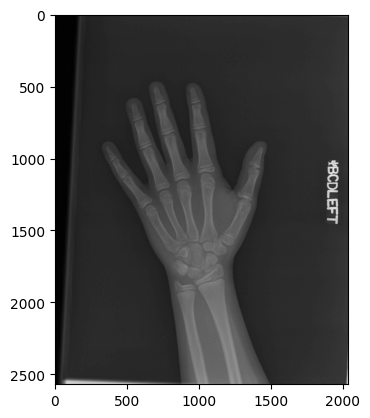

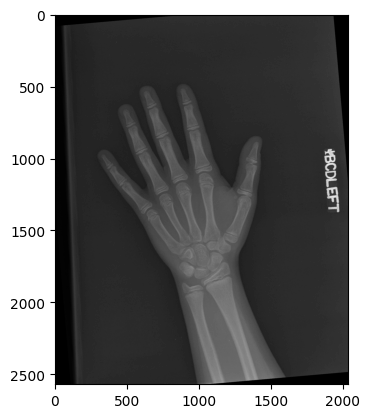

In [ ]:
from PIL import Image

Im1 = Image.open('/content/drive/MyDrive/Digital Image Processing Dataset/Hand Bone/1745.png')

rotated = Im1.rotate(5)

plt.figure(), plt.imshow(Im1 , cmap='gray')
plt.figure(), plt.imshow(rotated , cmap='gray')

In [ ]:
#Data = dicom.dcmread('/content/drive/MyDrive/Digital Image Processing Dataset/_Main Data/DICOM Data/knee2.dcm')
#image1 = Data.pixel_array
image = cv2.imread('/content/drive/MyDrive/Digital Image Processing Dataset/Breast mammography/27829188_g.png')
image1 = image[: ,: ,0]
Im2 = cv2.normalize(image1.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

In [ ]:
print([np.min(Im2) , np.max(Im2)])

[-8.673617379884035e-19, 0.9999999999999999]


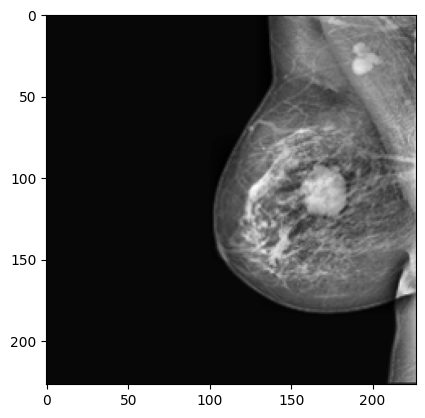

In [ ]:
plt.imshow(Im2 , cmap='gray')
plt.show()

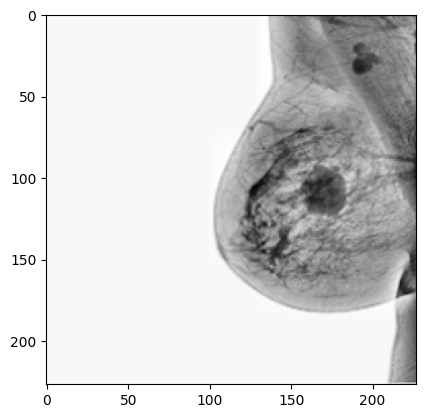

In [ ]:
image_n = 1-Im2
plt.imshow(image_n , cmap='gray')
plt.show()

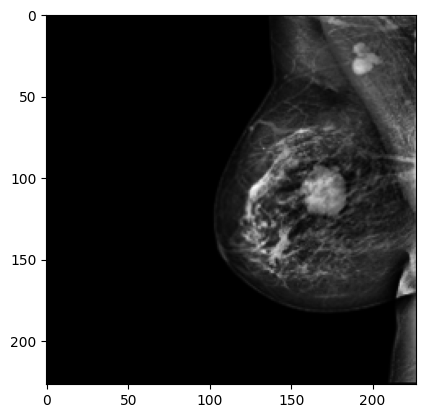

In [ ]:
image_p = Im2**2
plt.imshow(image_p , cmap = 'gray')
plt.show()

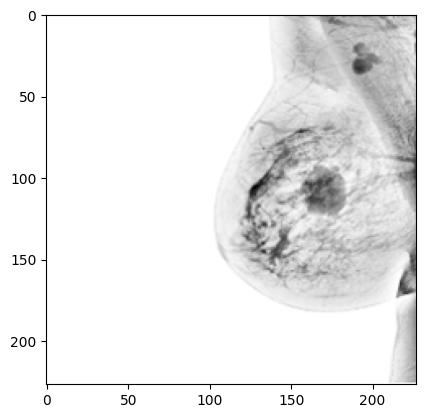

In [ ]:
image_n = 1-image_p
plt.imshow(image_n , cmap='gray')
plt.show()

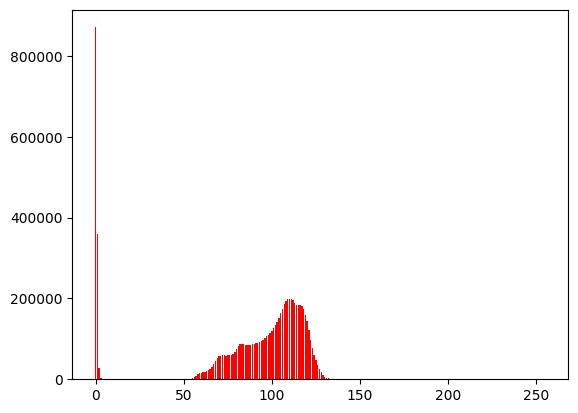

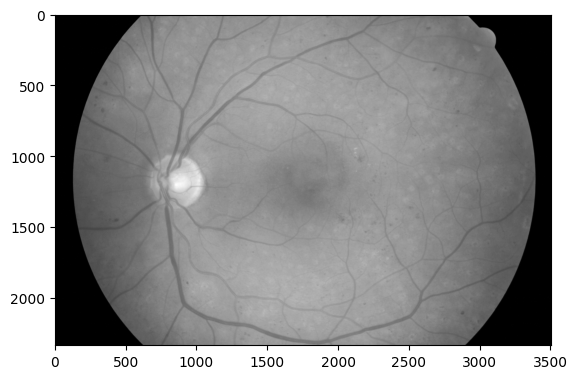

In [29]:
image = cv2.imread('/content/drive/MyDrive/Digital Image Processing Dataset/Retina/Eye_Data/images/01_dr.JPG', 0).astype(np.uint8)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.bar(np.arange(256), hist[: , 0] , color = 'r')
plt.show()

plt.figure()
plt.imshow(image , cmap='gray')


In [ ]:
a = image.ravel()
print(a)

[0 0 0 ... 0 0 0]


(288, 176, 208)


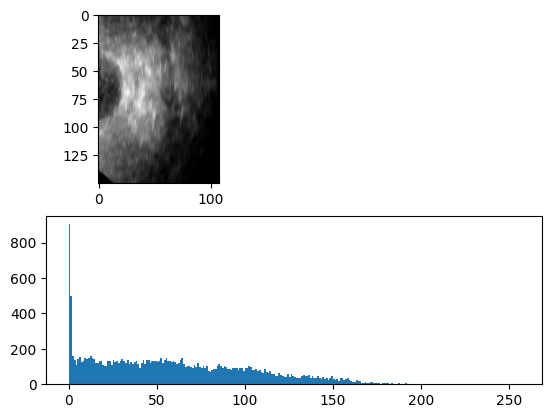

In [30]:
#Im= cv2.imread('/content/drive/MyDrive/Digital Image Processing Dataset/Spine/01-July-2019-19.jpg' , 0).astype(np.uint8)
Im , headerimage = nrrd.read('/content/drive/MyDrive/Echo_EDES_Segmentation/1075082_EDES/ED_1075082_org_1.nrrd')

print(Im.shape)
image = Im[100:250,100,100:]
plt.subplot(2 , 2 , 1)
plt.imshow(image , cmap = 'gray')
plt.subplot(2 , 1 , 2)
plt.hist(image.ravel(), 256, [0,256]);
plt.show()

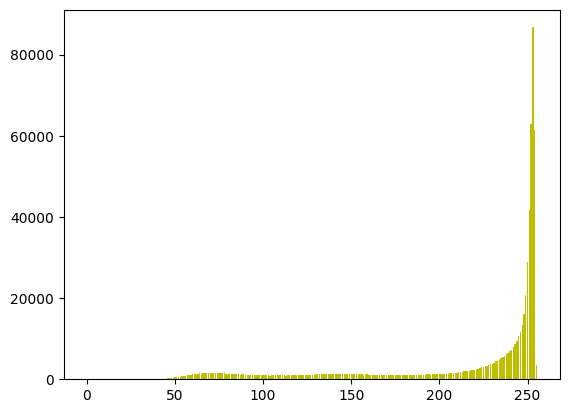

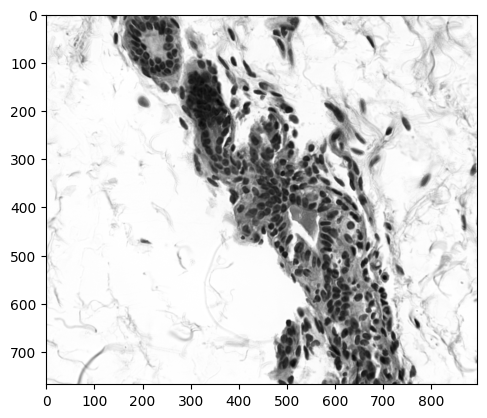

In [31]:
image = cv2.imread('/content/drive/MyDrive/Digital Image Processing Dataset/Pathology/Images/ytma55_030603_benign5_ccd.tif' , 0).astype(np.uint8)

hist, bins = np.histogram(image.ravel(), 256, [0, 256])
plt.bar(np.arange(256), hist, color = 'y')

plt.figure()
plt.imshow(image , cmap = 'gray')


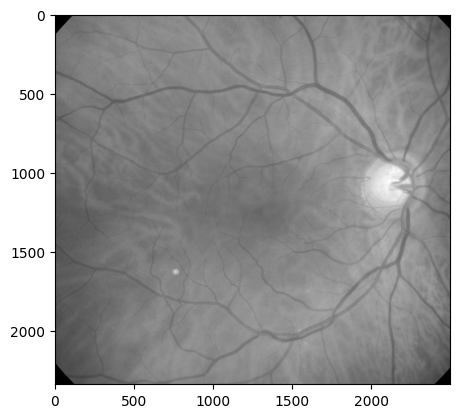

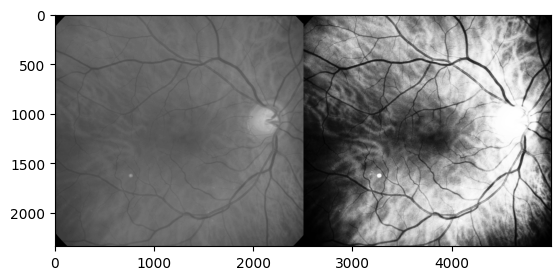

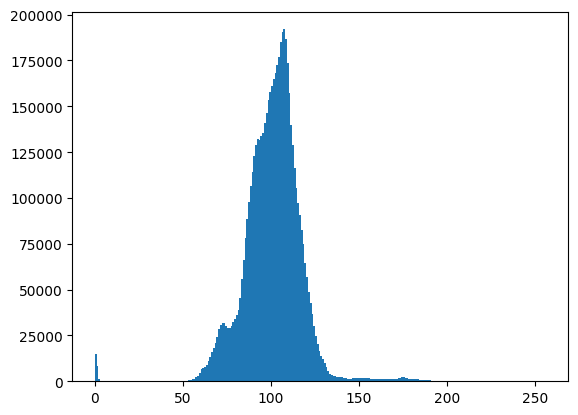

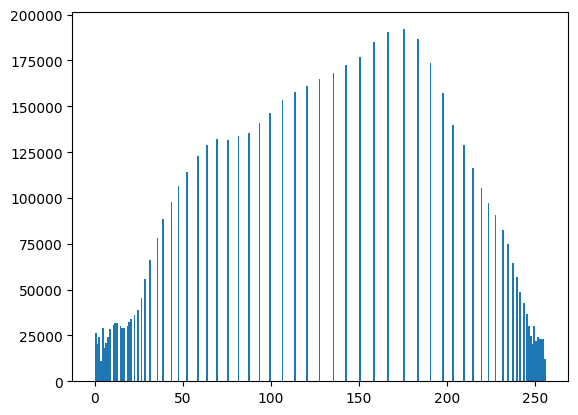

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Digital Image Processing Dataset/Retina/Eye_Data/images/11_g.jpg', 0).astype(np.uint8)
#image = cv2.imread('/content/drive/MyDrive/Digital Image Processing Dataset/Spine/01-July-2019-19.jpg', 0).astype(np.uint8)

image=image[:,500:3000]


Equ = cv2.equalizeHist(image)
res = np.hstack((image,Equ))
plt.figure()
plt.imshow(image, cmap='gray')

plt.figure()
plt.imshow(res, cmap='gray')

plt.figure()
plt.hist(image.ravel(), 256, [0,256]);

plt.figure()
plt.hist(Equ.ravel(), 256, [0,256]);


In [ ]:
image.shape

(2336, 3504)

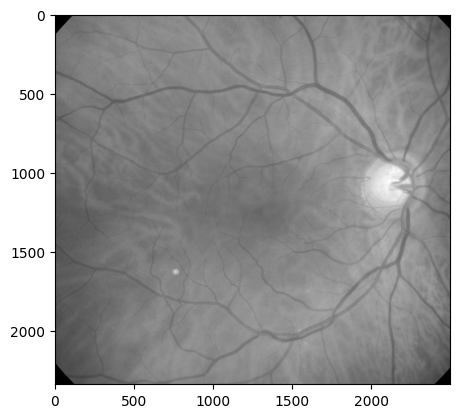

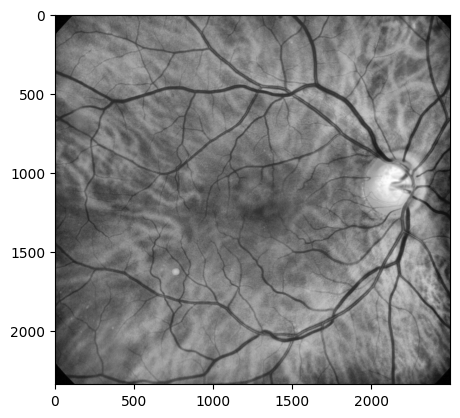

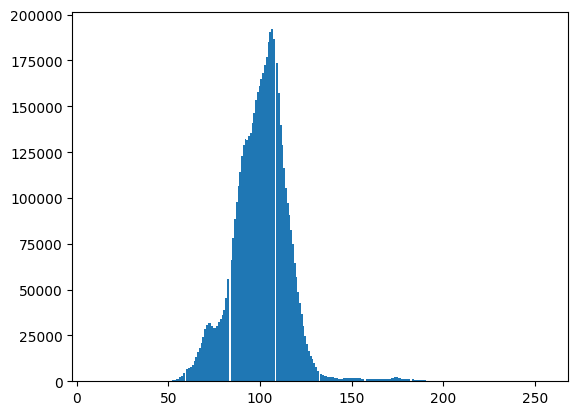

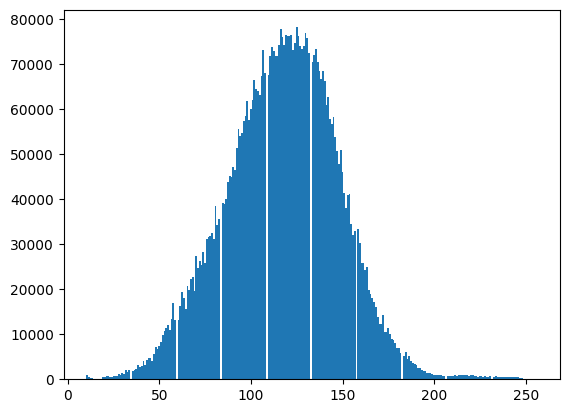

In [ ]:
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
Im_CLAHE = clahe.apply(image[:,:])

plt.figure()
plt.imshow(image , cmap='gray')
plt.figure()
plt.imshow(Im_CLAHE , cmap='gray')

plt.figure()
plt.hist(image.ravel(), 256, [10,256]);

plt.figure()
plt.hist(Im_CLAHE.ravel(), 256, [10,256]);

In [ ]:
from skimage.metrics import structural_similarity as compare_ssim

In [ ]:
(score, diff) = compare_ssim(image[:,:,1], Im_Equ, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(round(score, 4)))

SSIM: 0.6011


In [ ]:
(score, diff) = compare_ssim(image[:,:,1], Im_CLAHE, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(round(score, 4)))

SSIM: 0.7752


In [ ]:
def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

In [ ]:
score = mse(image[:,:,1], Im_Equ)
print(round(score , 4))

4432.3656


In [ ]:
score = mse(image[:,:,1], Im_CLAHE)
print(round(score , 4))

599.3837


In [ ]:
psnr1 = cv2.PSNR(image[:,:,1], Im_Equ)
psnr2 = cv2.PSNR(image[:,:,1], Im_CLAHE)

print(psnr1)
print(psnr2)

11.664447857868495
20.353754307013887


[array([  0,  12,  21,  29,  38,  46,  55,  63,  72,  80,  89,  97, 106,
       114, 123, 131, 140, 148, 157, 165, 174, 182, 191, 199, 208, 216,
       225, 233, 242, 255], dtype=uint8), 30]


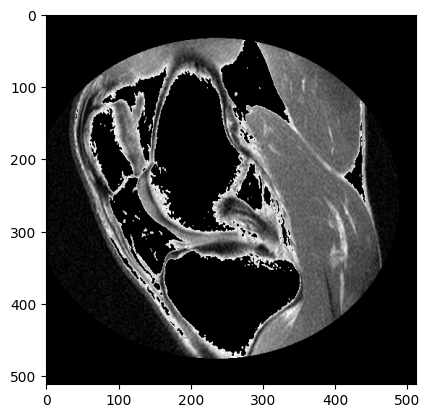

In [ ]:
w, h = image1.shape
img_q = np.zeros(image1.shape , np.uint8)

q_n = 30
Threshod = np.linspace(0, 255, q_n+1).astype(np.uint8)
k = 0

for i in range(w):
  for j in range(h):

    for k in range(0 , len(Threshod)-1):
      if Threshod[k]<=image1[i , j]<Threshod[k+1]:
        if Threshod[k]==0:
          img_q[i , j] = 0
          break
        elif Threshod[k+1]==255:
          img_q[i , j] = 255
          break
        else:
          img_q[i , j] = np.mean([Threshod[k] , Threshod[k+1]])
          break
      else:
          continue
  k=0

q_n_i = np.unique(img_q)
print([q_n_i , len(q_n_i)])
plt.imshow(img_q, cmap='gray')
plt.show()

In [ ]:
im.max()

253

In [ ]:
im.min()

0

uint8
[50, 250]


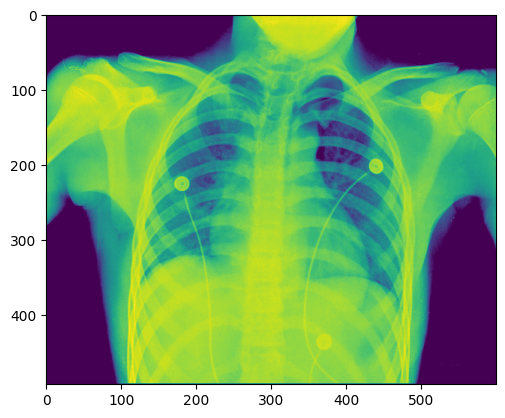

In [ ]:
# [150 , 250]
a = 150
b = 250
image02 = np.uint8(((b-a)*(image01-image01.min())/(image01.max() - image01.min()))+a)
print(image02.dtype)
print([np.min(image02) , np.max(image02)])
plt.imshow(image02 )

(1482, 750)
(1482, 750)
[dtype('float64'), dtype('float64'), dtype('float64')]
[9.0, 608.0597246963563, 5472.537522267206]


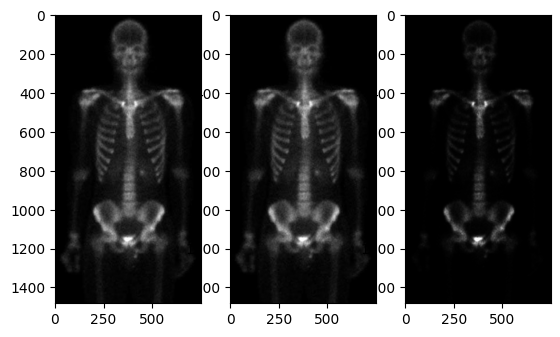

In [ ]:
ImageA = cv2.imread('/content/drive/MyDrive/Digital Image Processing Dataset/Pictures of Gonzalez Book/DIP3E_CH02_Original_Images/Fig0232(a)(partial_body_scan).tif' , 0).astype(np.float64)
print(ImageA.shape)
ImageB = (3*(np.mean(ImageA))*ImageA)
print(ImageB.shape)

im = ImageA * ImageB
Z = np.stack((ImageA , ImageB))

print([ImageA.dtype , ImageB.dtype , im.dtype])
print([ImageA[1250 , 500] , ImageB[1250 , 500] , im[1250 , 500]])

plt.figure()
plt.subplot(1 , 3 , 1)
plt.imshow(ImageA , cmap='gray')
plt.subplot(1 , 3 , 2)
plt.imshow(ImageB, cmap='gray')
plt.subplot(1 , 3 , 3)
plt.imshow(im, cmap='gray')